##### Numerical Computation

##### Andrew Pickner

I worked alone on this assignment.

# Compute the derivative of `f(x)`

$f(x) = \frac{1}{1+e^x} - \frac{1}{2}$

My differentiation skills are not ideal when it comes to anything that isn't a polynomial, but luckily I know some great online resources. 

Initially, I wanted to see what `f(x)` looked like so I checked out Desmos. This function seemed relatively easy to visualize `f'(x)`.

Wolfram Alpha and Symbolab both gave me $f'(x)=-\frac{e^x}{(1+e^x)^2}$, which I then plugged back into Desmos and all looked correct! Plus, I confirmed the real root `r` is $0$.

# Implement Newton's method

So obviously class and Sauer's textbook were helpful in developing pseudocode, I found this [website](https://moonbooks.org/Articles/How-to-use-the-Newtons-method-in-python-/) to have a nice and concise write-up and I liked the code style they used so I modeled mine after theirs. When thinking about the 'interface', I chose to add a parameter for `f'(x)` as opposed to using scipy to differentiate `f(x)` because this seemed a little hacky

In [22]:
# it might be helpful to have tolerance as a parameter
def newtons_method(f,Df,x0,epsilon,max_iter):
    xn = x0
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
#             print('Found solution after',n,'iterations.')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
#             print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/Dfxn
#     print('Exceeded maximum iterations. No solution found.')
    return None

import numpy as np

f       = lambda x: (((1) / (1 + np.exp(x))) - (1/2))
f_prime = lambda x: ((- np.exp(x)) / ((1 + np.exp(x)) ** 2))

print(newtons_method(f, f_prime, 0.5, 0.000000001, 20))

1.5516754209104165e-16


# Choose an interval around `r=0` and check whether the points converge or not

In [36]:
import numpy as np

# function we are testing and its derivative
f       = lambda x: (((1) / (1 + np.exp(x))) - (1/2))
f_prime = lambda x: ((- np.exp(x)) / ((1 + np.exp(x)) ** 2))

# change this number to play with the interval...
boundry = 0.177

grid_num = 2000
for i in range(0, 5):
    xs = np.linspace(-boundry - i, boundry + i, num=grid_num)
    print("[{}, {}]".format(-boundry - i, boundry + i))
    count = 0
    for each in xs:
        ret = newtons_method(f, f_prime, each, 0.00001, 25)
        if ret != None:
            count += 1
    print("{}%".format((count / grid_num) * 100))

[-0.177, 0.177]
100.0%
[-1.177, 1.177]
100.0%
[-2.177, 2.177]
100.0%
[-3.177, 3.177]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """


68.5%
[-4.177, 4.177]
52.1%


I didn't do a very elegant experiment to find the interval on which everything converges. However, by screwing around with the variable `boundry`, I was able to see that 100% of points on the interval `[-2.177, 2.177]` converge and only 99.9% converge when we make the interval: `[-2.178, 2.178]`.

# Report the interval for which all initial guesses converge

`[-2.177, 2.177]`

This is the interval I found to be completely convergent in my little experiment above.

# Plot the function and the interval on which all guesses converge

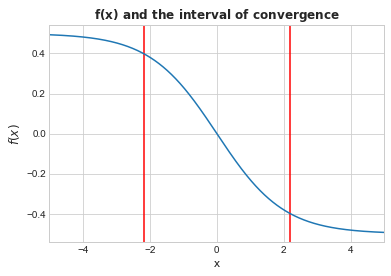

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

n_left = -5
n_right = 5
xs = np.linspace(n_left, n_right, num=8000)

fig = plt.figure()
ax1 = plt.axes()

ax1.set_xlabel("x", fontsize=12)
ax1.set_ylabel("$f(x)$", fontsize=12)
ax1.set_title("$\\bf{f(x)\ and\ the\ interval\ of\ convergence}$", fontsize=12)

plt.xlim([n_left, n_right])

plt.axvline(x=-2.177, color="red")
plt.axvline(x=2.177, color="red")

plt.plot(xs, f(xs))

So I'm not entirely sure why the function converges on the interval it does, it seems odd that it only takes a change of `0.001` to make to function diverge.